In [8]:
pip install easyocr opencv-python numpy


In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
# STEP 2: Install dependencies
!pip install easyocr opencv-python-headless


In [12]:
# STEP 3: Import modules
import cv2
import re
import os
from easyocr import Reader

# Initialize reader
reader = Reader(['fr'], gpu=False)

# Folder with images
folder_path = r'/content/drive/MyDrive/id_dataset/images'


# Helper function
def extract_fields(text):
    fields = {}
    lines = [line.strip() for line in text.split('\n') if line.strip()]

    # --- CIN ---
    cin_match = re.search(r'\b[A-Z]{1,2}\d{4,6}\b', text)
    if cin_match:
        fields['cin'] = cin_match.group()

    # --- Dates ---
    dates = re.findall(r'\b\d{2}[./-]\d{2}[./-]\d{4}\b', text)
    if len(dates) >= 1:
        fields['date_of_birth'] = dates[0]
    if len(dates) >= 2:
        fields['expiry_date'] = dates[1]

    # --- Full name (2 last capital words before NÉ) ---
    for line in lines:
        if re.search(r'\bN[ÉEéèe]\b', line, re.IGNORECASE):
            # Take part before "NÉ"
            before_ne = re.split(r'\bN[ÉEéèe]\b', line, flags=re.IGNORECASE)[0]
            # Extract all ALL-CAPS words
            words = re.findall(r'\b[A-Z]{2,}\b', before_ne)
            if len(words) >= 2:
                fields['full_name'] = ' '.join(words[-2:])
            break

    return fields





In [13]:
import os

# Start from root of Google Drive
base_path = '/content/drive/MyDrive/Colab Notebooks'

# List subdirectories and files
for root, dirs, files in os.walk(base_path):
    print(f"\n Folder: {root}")
    for d in dirs:
        print(f"    {d}")
    for f in files:
        print(f"    {f}")



 Folder: /content/drive/MyDrive/Colab Notebooks
    Copy of Séance 11 & 12 & 13 - Les chaines de caractères (1)
    Copy of Séance 11 & 12 & 13 - Les chaines de caractères
    Copy of Untitled0.ipynb
    modeltrainig.ipynb
    gptapi.ipynb
    Untitled0.ipynb
    Untitled1.ipynb
    Untitled2.ipynb
    Untitled3.ipynb
    id _match_info.ipynb


In [14]:
search_root = '/content/drive/MyDrive'

for root, dirs, files in os.walk(search_root):
    if 'images' in dirs:
        print(" Found folder:", os.path.join(root, 'images'))


 Found folder: /content/drive/MyDrive/id_dataset/images



 Processing: id1.jpg


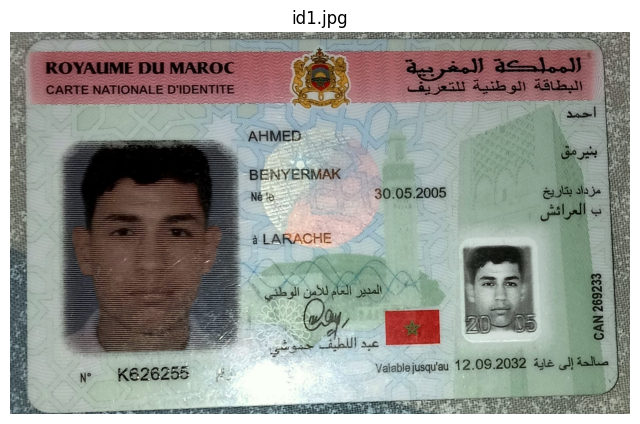

 Raw Text: ROIAUNE DUMAROC CARTE NATIDNAEEDidentie a8asals Loea Za  s1 5804 4 12/ AHMED 5oa BENYERMAK Né '2 30.05.2005 ëJ4? (ble ia #slji à LARACHE sil Ji MSu PUI Jaji ; C9l 3 95 L4hll 4 Valablejusqu'au 12.09.2032 zlè >ll ialLa N' K626255
 Extracted Fields:
   cin: K626255
   date_of_birth: 30.05.2005
   expiry_date: 12.09.2032
   full_name: AHMED BENYERMAK

 Processing: id2.jpg


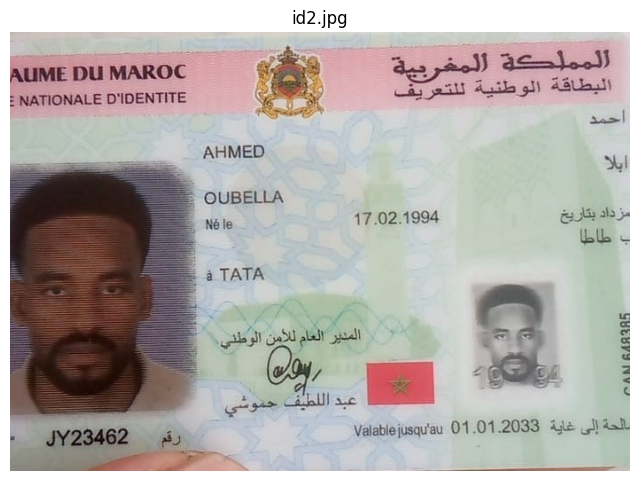

 Raw Text: AUME DU MAROC F NATIONALE D'IDENTITE aJ 34 LoJJ 5W Vi9| 1gubdl e AHMED Xl OUBELLA Né le 17.02.1994 864 ILL TATA ~bji jnsu li i ~kl ç Valable jusquau 01.01.2033 ~le  JY23462
 Extracted Fields:
   cin: JY23462
   date_of_birth: 17.02.1994
   expiry_date: 01.01.2033
   full_name: AHMED OUBELLA

 Processing: id4.jpg


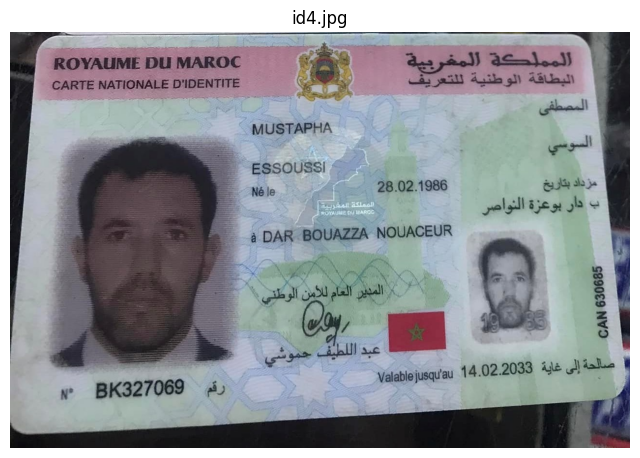

 Raw Text: ROYAUME DU MAROC CARTE NATIONALE D'IDENTITE aæ~J) asLJJJ Lw Zy1 4sUb4i Gihaji F~SJi MUSTAPHA ESSOUSSI 28.02.1986 Né le 9 Goyauee Duraan à DAR BOUAZZA NOUACEUR àl - 4 Jelsll ;;43 Jl 4iL si ùSU plli Mi 8 Ool 5 12943 ~kll 4 Valablejusqu'au 14.02.2033 gl Jl il N' BK327069
 Extracted Fields:
   cin: BK327069
   date_of_birth: 28.02.1986
   expiry_date: 14.02.2033
   full_name: MUSTAPHA ESSOUSSI


In [16]:
import os
import cv2
import matplotlib.pyplot as plt

#  STEP 4: Process all images and show them
folder_path = r'/content/drive/MyDrive/id_dataset/images'

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        print(f"\n Processing: {filename}")

        #  Display the image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(img_rgb)
        plt.title(filename)
        plt.axis('off')
        plt.show()

        #  OCR
        results = reader.readtext(image_path, detail=0, paragraph=True)
        raw_text = ' '.join(results)

        print(" Raw Text:", raw_text)

        #  Extract fields
        fields = extract_fields(raw_text)

        print(" Extracted Fields:")
        for k, v in fields.items():
            print(f"   {k}: {v}")


In [17]:
import os

#  Folder path
folder_path = r'/content/drive/MyDrive/id_dataset/images'
available_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))])

#  Show image options
#  Show available files
print(" Available ID images:")
for fname in available_files:
    print(f" - {fname}")

#  Ask user to type the actual filename
while True:
    selected_file = input(" Enter the exact filename (e.g. id12.jpg): ").strip()
    if selected_file in available_files:
        break
    else:
        print(" File not found. Please enter a valid filename from the list above.")


image_path = os.path.join(folder_path, selected_file)

print(f"\n Processing: {selected_file}")

#  OCR (your working method)
results = reader.readtext(image_path, detail=0, paragraph=True)
raw_text = ' '.join(results)  # <--- your original working method

print(" Raw Text:", raw_text)

#  Extract fields (uses your working extract_fields function)
fields = extract_fields(raw_text)

print(" Extracted Fields:")
for k, v in fields.items():
    print(f"   {k}: {v}")

#  Ask user for expected values
print("\n Now enter expected values to compare:")
user_input = {
    "cin": input(" CIN: ").strip().upper(),
    "full_name": input(" Full Name (ALL CAPS): ").strip().upper(),
    "date_of_birth": input(" Date of Birth (DD.MM.YYYY): ").strip(),
    "expiry_date": input(" Expiry Date (DD.MM.YYYY): ").strip()
}

#  Compare extracted vs user input
print("\n Comparison Results:")
for field in user_input:
    expected = user_input[field].strip().upper()
    found = fields.get(field, "").strip().upper()
    status = " MATCH" if expected == found else "MISMATCH"
    print(f"   {field}: {status} (Expected: {expected}, Found: {found})")




 Available ID images:
 - id1.jpg
 - id2.jpg
 - id4.jpg
 Enter the exact filename (e.g. id12.jpg): id4.jpg

 Processing: id4.jpg
 Raw Text: ROYAUME DU MAROC CARTE NATIONALE D'IDENTITE aæ~J) asLJJJ Lw Zy1 4sUb4i Gihaji F~SJi MUSTAPHA ESSOUSSI 28.02.1986 Né le 9 Goyauee Duraan à DAR BOUAZZA NOUACEUR àl - 4 Jelsll ;;43 Jl 4iL si ùSU plli Mi 8 Ool 5 12943 ~kll 4 Valablejusqu'au 14.02.2033 gl Jl il N' BK327069
 Extracted Fields:
   cin: BK327069
   date_of_birth: 28.02.1986
   expiry_date: 14.02.2033
   full_name: MUSTAPHA ESSOUSSI

 Now enter expected values to compare:
 CIN: BK327069
 Full Name (ALL CAPS): AYA RABEH
 Date of Birth (DD.MM.YYYY): 14.02.2033
 Expiry Date (DD.MM.YYYY): 14.02.2033

 Comparison Results:
   cin:  MATCH (Expected: BK327069, Found: BK327069)
   full_name: MISMATCH (Expected: AYA RABEH, Found: MUSTAPHA ESSOUSSI)
   date_of_birth: MISMATCH (Expected: 14.02.2033, Found: 28.02.1986)
   expiry_date:  MATCH (Expected: 14.02.2033, Found: 14.02.2033)
